In [1]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning Data

In [11]:
playlist_file_path = 'datasets/Playlist1.json'
with open(playlist_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

rows = []

for playlist in data['playlists']:
    playlist_name = playlist['name']
    last_modified_date = playlist['lastModifiedDate']
    
    #Iterate through each item
    for item in playlist['items']:
        track = item['track']
        rows.append({
            'playlist_name': playlist_name,
            'last_modified_date': last_modified_date,
            'track_name': track['trackName'],
            'artist_name': track['artistName'],
            'album_name': track['albumName'],
            'track_uri': track['trackUri'],
            'added_date': item['addedDate']
        })

df = pd.DataFrame(rows)

df.tail(10)

,playlist_name,last_modified_date,track_name,artist_name,album_name,track_uri,added_date
232,Lo-fi of Lee,2021-12-18,Relax your mind,Lee,Lo-fi of Lee,spotify:track:65AB4GO61fFjMZBRwpn2T0,2021-12-18
233,Lo-fi of Lee,2021-12-18,Like The Sun,Lee,Lo-fi of Lee,spotify:track:3zLjH6GAa99XP06HK68mmo,2021-12-18
234,Lo-fi of Lee,2021-12-18,Moon,Lee,Lo-fi of Lee,spotify:track:5cgtI2cqHkUuPG3TsVAkvg,2021-12-18
235,Lo-fi of Lee,2021-12-18,island,Lee,Lo-fi of Lee,spotify:track:1GmLTvxG6mjA7X5Cee47M6,2021-12-18
236,Lo-fi of Lee,2021-12-18,Her,Lee,Lo-fi of Lee,spotify:track:62esNF1khuxbvAbQJwPfjy,2021-12-18
237,Lo-fi of Lee,2021-12-18,I Need You,Lee,Lo-fi of Lee,spotify:track:02hB7HaYRMrxBsDd3sbwu4,2021-12-18
238,Lo-fi of Lee,2021-12-18,Like a Dream,Lee,Lo-fi of Lee,spotify:track:3KyLgJwYjQIdIMnFvNWZ0O,2021-12-18
239,Lo-fi of Lee,2021-12-18,Breathin,Lee,Lo-fi of Lee,spotify:track:1QMyJ8Q8bwl7zFo1vyKowC,2021-12-18
240,Lo-fi of Lee,2021-12-18,You're Beautiful,Lee,Lo-fi of Lee,spotify:track:2Pvd5RWEbis40GbvxA3eck,2021-12-18
241,Lo-fi of Lee,2021-12-18,Only Hope,Lee,Lo-fi of Lee,spotify:track:2xw5tfUKqTD46SQG2Twv9K,2021-12-18


In [5]:
df.isna().sum()

playlist_name         0
last_modified_date    0
track_name            0
artist_name           0
album_name            0
track_uri             0
added_date            0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

# Top Artists

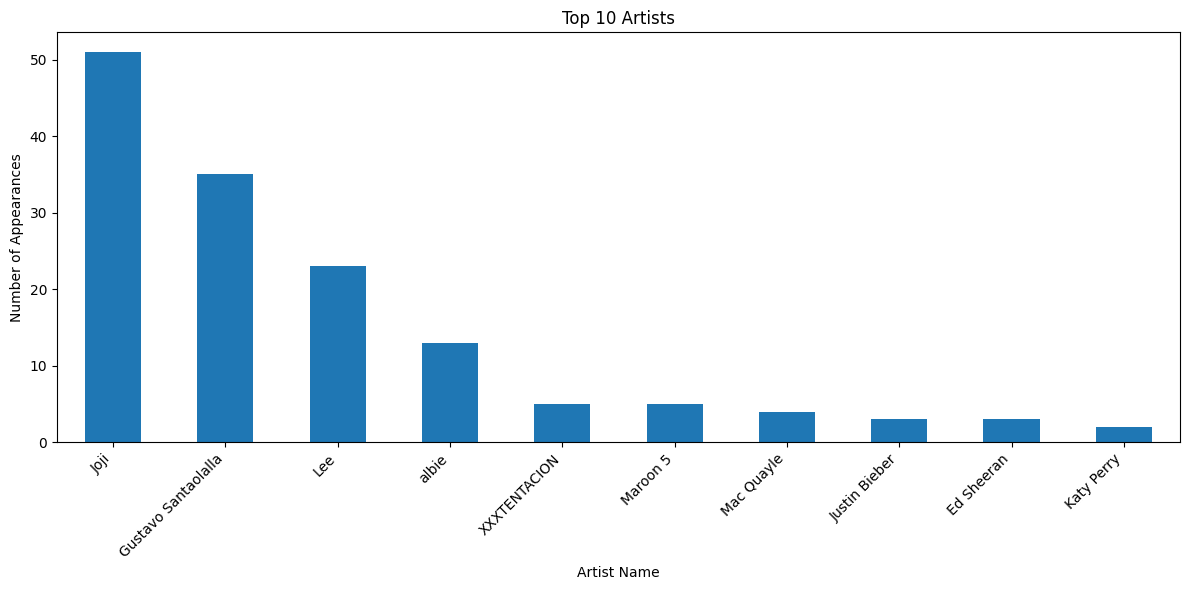

In [12]:
artist_counts = df['artist_name'].value_counts()

top_artists = artist_counts.head(10)

plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar')
plt.title('Top 10 Artists')
plt.xlabel('Artist Name')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()